1941


V28    38.0
V29     0.0
V30     0.0
V31     0.0
V32     0.0
V33     0.0
V34     0.0
dtype: float64

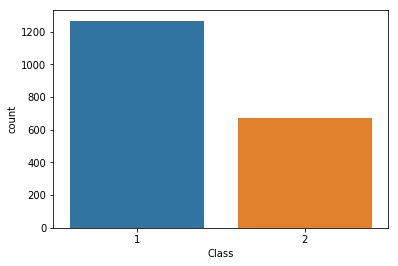

In [4]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression#CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import sklearn as sk
import matplotlib.pyplot as plt
import os
import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split

df = pd.read_csv(os.getcwd()+'/steel_data.csv')

sns.countplot(x="Class", data= df)



df_class1 = df[df.Class==1]
df_class2 = df[df.Class==2]
#df_class2_upsampled = sk.utils.resample(df_class2,
#                                        replace=True,
#                                        n_samples=1268)
#df = pd.concat([df_class1, df_class2_upsampled])
print(len(df))
sns.countplot(x="Class", data= df)

df.loc[df['Class'] == 1, 'V34'] = 0
df.loc[df['Class'] == 2, 'V34'] = 1


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-8], df[['V28','V29','V30','V31','V32','V33','V34']] ,test_size=0.3)


#clf.predict([X_test,y_test])

# w = clf.coef_[0]
# print(w)

# a = -w[0] / w[1]

# xx = np.linspace(0,12)
# yy = a * xx - clf.intercept_[0] / w[1]

# h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

# plt.scatter(X[:, 0], X[:, 1], c = y)
# plt.legend()
# plt.show()
y_test[y_test['V28']==1].sum()

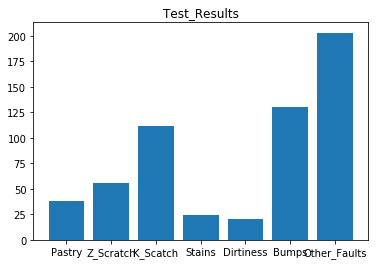

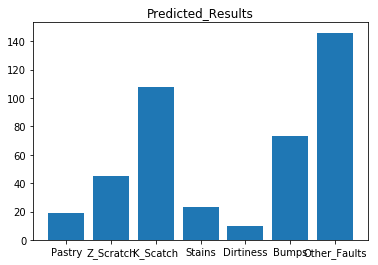

{'Pastry': 38.0, 'Z_Scratch': 56.0, 'K_Scatch': 112.0, 'Stains': 24.0, 'Dirtiness': 20.0, 'Bumps': 130.0, 'Other_Faults': 203.0}
{'Pastry': 19.0, 'Z_Scratch': 45.0, 'K_Scatch': 108.0, 'Stains': 23.0, 'Dirtiness': 10.0, 'Bumps': 73.0, 'Other_Faults': 146.0}
Accuracy_Score= 0.6174957118353345
Feature Importances [0.04672708 0.03659564 0.03532679 0.03316757 0.05924733 0.03585503
 0.03176025 0.05295571 0.03609719 0.03160395 0.05754913 0.0219163
 0.019841   0.06006414 0.02999613 0.02957059 0.03788253 0.06242748
 0.02629771 0.02404496 0.00367097 0.05725832 0.05681639 0.0195566
 0.03964551 0.03626091 0.01786478]


<BarContainer object of 27 artists>

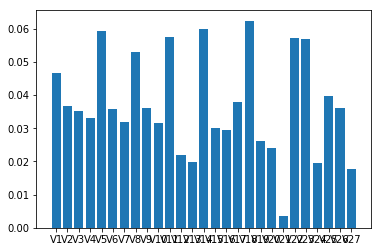

In [5]:
# X_train=X_train[['V11','V14']]
# X_test=X_test[['V11','V14']]
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train,y_train)
classes={'V28':'Pastry','V29':'Z_Scratch','V30':'K_Scatch','V31':'Stains','V32':'Dirtiness','V33':'Bumps','V34':'Other_Faults'}

#clf = svm.SVC(kernel='linear', C = 1.0)
#clf.fit(X_train,y_train)
y_predicted=clf.predict(X_test)
#print(y2_predicted,y_test)
count=0

cl_count_test={'Pastry':count,'Z_Scratch':count, 'K_Scatch':count, 'Stains':count,'Dirtiness':count, 'Bumps':count,'Other_Faults':count}
cl_count_predicted={'Pastry':count,'Z_Scratch':count, 'K_Scatch':count, 'Stains':count,'Dirtiness':count, 'Bumps':count,'Other_Faults':count}

y_predicted_df=pd.DataFrame(y_predicted,columns=y_test.columns)
#print(y_predicted_df[y_predicted_df[['V28']]==1].sum())#y_predicted_df)
for i in range(28,35):
    index='V'+str(i)
    test_class=y_test[y_test[[index]]==1].sum()
    cl_count_test[classes[index]]= test_class[index]
    #print(cl_count_predicted['Pastry'])
    predicted_class=y_predicted_df[y_predicted_df[[index]]==1].sum()
    cl_count_predicted[classes[index]]= predicted_class[index]
    
plt.bar(x=cl_count_test.keys(),height=cl_count_test.values())
plt.title('Test_Results')
plt.show()
plt.bar(x=cl_count_predicted.keys(),height=cl_count_predicted.values())
plt.title('Predicted_Results')
plt.show()
print(cl_count_test)
print(cl_count_predicted)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y_predicted))
print("Feature Importances",clf.feature_importances_)
imp_features=clf.feature_importances_
#imp_features=imp_features[:]
imp_feature_names=X_train.columns[:]

y_pos=np.arange(len(imp_feature_names))

plt.bar(x=imp_feature_names,height=imp_features,width=0.8)
#plt.xticks(y_pos,imp_feature_names)
#plt.bar(x=y_pos,height=imp_features,width=0.8)


In [6]:

# clf = LogisticRegression()
# clf.fit(X_train,y_train)
# y2_predicted=clf.predict(X_test)
# print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))


Confusion matrix, without normalization
[[ 32   0   1   0   0   2   3]
 [  8  44   0   0   0   0   4]
 [  5   0 106   0   0   0   1]
 [  0   0   0  21   0   1   2]
 [  6   0   0   0  10   1   3]
 [ 60   1   0   0   0  51  18]
 [ 67   0   1   2   0  18 115]]
Normalized confusion matrix
[[0.84 0.   0.03 0.   0.   0.05 0.08]
 [0.14 0.79 0.   0.   0.   0.   0.07]
 [0.04 0.   0.95 0.   0.   0.   0.01]
 [0.   0.   0.   0.88 0.   0.04 0.08]
 [0.3  0.   0.   0.   0.5  0.05 0.15]
 [0.46 0.01 0.   0.   0.   0.39 0.14]
 [0.33 0.   0.   0.01 0.   0.09 0.57]]


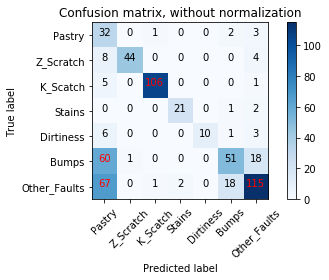

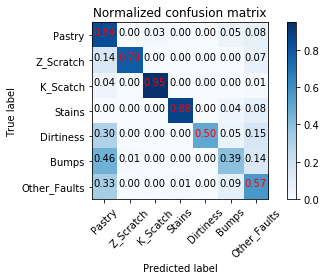

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="Red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = sk.metrics.confusion_matrix(y_test.values.argmax(axis=1), y_predicted_df.values.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes.values(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()



In [8]:
# PCA + Random forest
dr=PCA(n_components=20)
X_train_reduced=dr.fit_transform(X_train)
X_test_reduced=dr.fit_transform(X_test)

In [9]:

clf = RandomForestClassifier(n_estimators = 10)
#clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_reduced,y_train)
y_predicted=clf.predict(X_test_reduced)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y_predicted))

Accuracy_Score= 0.2144082332761578


Accuracy_Score= 0.24528301886792453


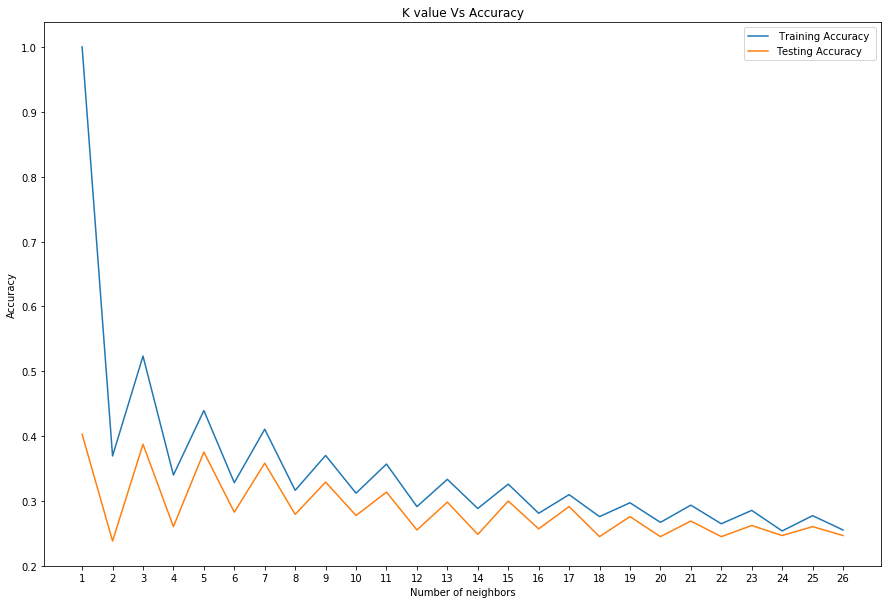

In [10]:
clf= KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train,y_train)
y_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y_predicted))

train_accuracy = []
test_accuracy = []

for k in range(1,27):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.figure(figsize= [15,10])
plt.plot(range(1,27), train_accuracy, label= " Training Accuracy ")
plt.plot(range(1,27), test_accuracy, label= "Testing Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("K value Vs Accuracy")
plt.xticks(range(1,27))
plt.show()

In [11]:
# df
# df.loc[df['Class'] == 2]
# df.loc[df['Class'] == 1, 'V34'] = 0
# df.loc[df['Class'] == 2, 'V34'] = 1
# df